In [1]:
%run my_functions.ipynb

In [2]:
#sat_formula = random_kcnf(n_literals=5,n_conjuncts=5,k=3)
sat_formula = [[1, 4, -5], [2, 3, 5], [-2, -4, 5], [-2, -4, -5], [3, 4, 5]]

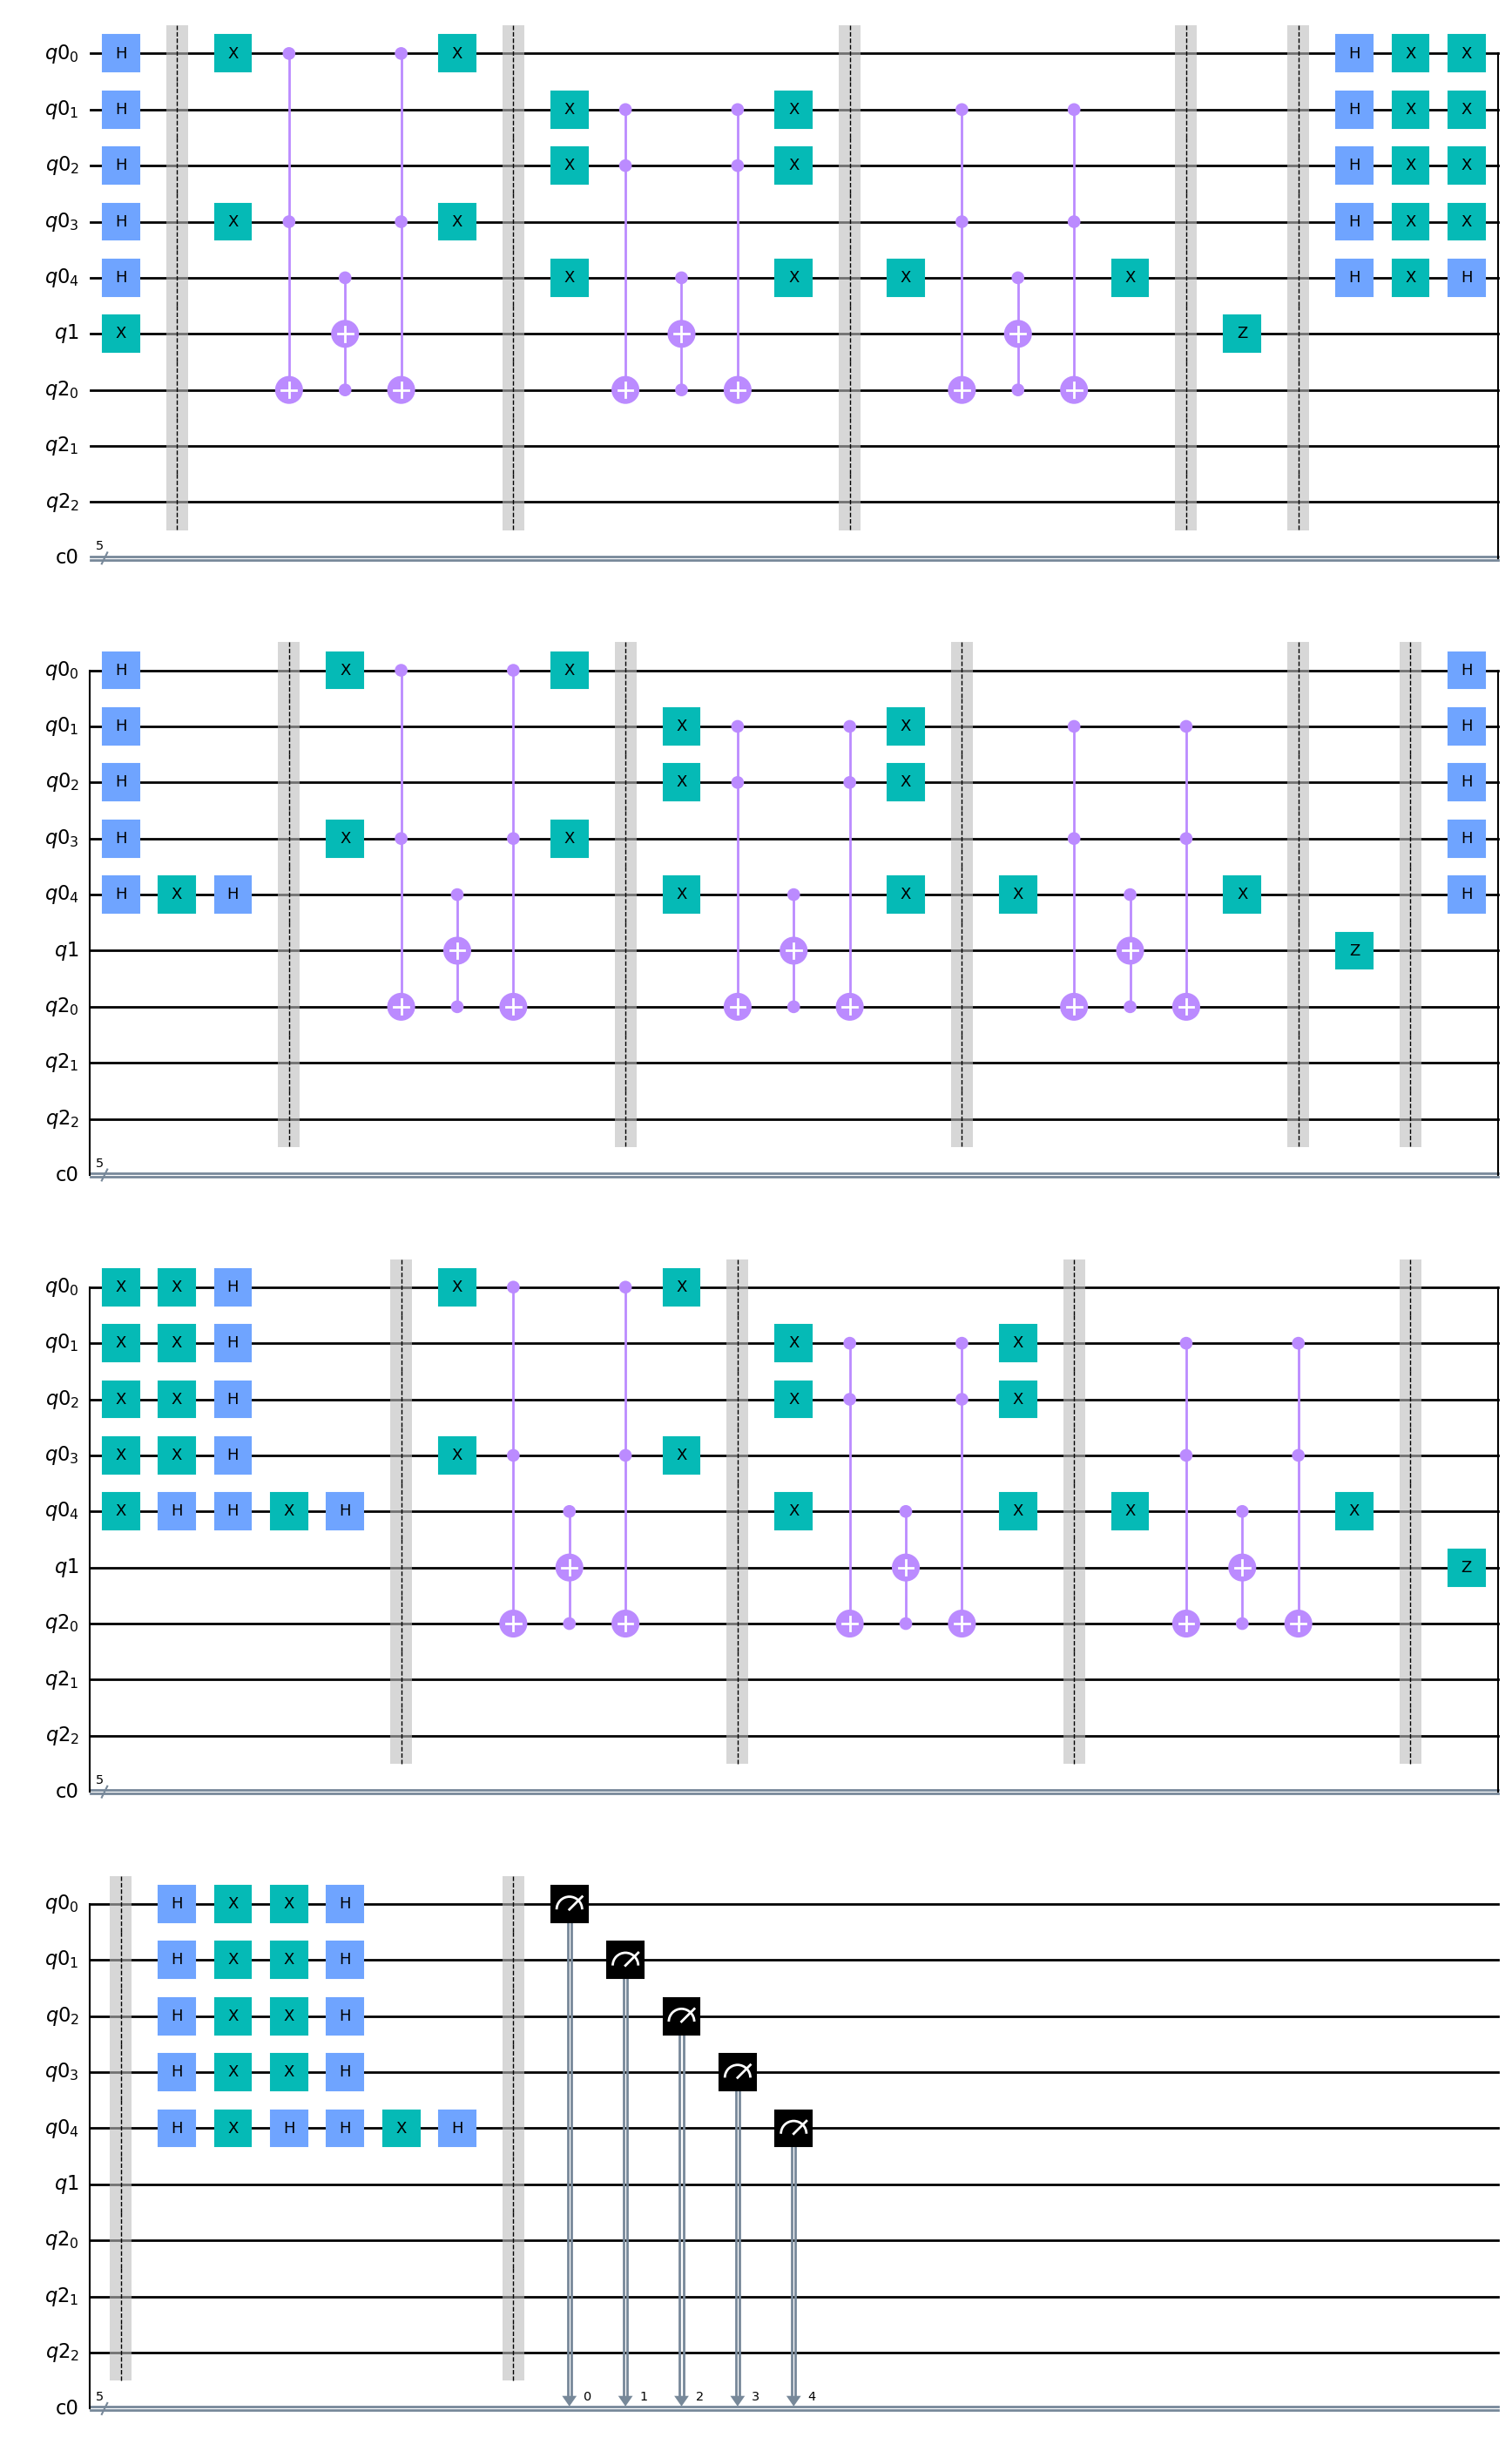

In [3]:
quant_part = [sat_formula[0]]+[sat_formula[1]] + [sat_formula[2]]
qc = hybrid_sat3(quant_part)
qc.draw('mpl')

In [4]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
soln = []
all_soln = []
for key,value in counts.items():
    all_soln.append(key)
    if value>sum(counts.values())/len(counts):
        soln.append(key)

quant_soln = [element[::-1] for element in soln]
print("Measurement results:",counts)
print("Max values above average from the dictionary:", quant_soln)

Measurement results: {'11110': 33, '00101': 22, '10110': 36, '01010': 25, '00100': 34, '11000': 32, '10101': 29, '10010': 31, '11100': 37, '10011': 46, '01110': 32, '01000': 37, '01100': 24, '01001': 34, '11010': 32, '10001': 36, '00010': 42, '01011': 40, '00011': 29, '00111': 29, '01111': 38, '11101': 23, '10111': 33, '10100': 26, '11111': 37, '11011': 29, '10000': 30, '01101': 32, '11001': 31, '00000': 34, '00001': 25, '00110': 26}
Max values above average from the dictionary: ['01111', '01101', '00100', '00111', '11001', '00010', '10010', '10001', '01000', '11010', '11110', '11101', '11111', '00000']


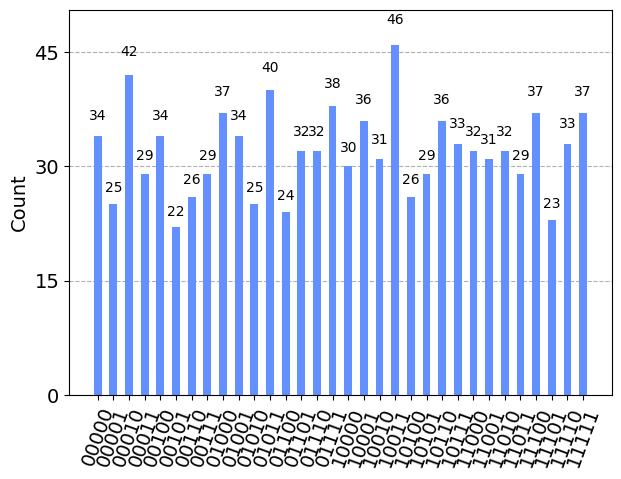

In [5]:
plot_histogram(counts)

In [6]:
classical_sat_checker(quant_part,quant_soln)

['01111', '00100', '00111', '11001', '10001', '01000', '11101', '11111']

In [7]:
print(len(classical_sat_checker(quant_part,quant_soln)))
print(len(quant_soln))

8
14


The length of quantum_solution list is not same before and after verifying using classical_sat_checker because, we have used just the vanilla method off choosing the elements
which have more than the average probability of appearing. This method might sometimes consider non-solutions as solutions.

In [8]:
new_quant_soln = classical_sat_checker(quant_part,quant_soln)

In [9]:
classical_part = [sat_formula[3]]+[sat_formula[4]]
sat_solution = classical_sat_checker(classical_part,new_quant_soln)
sat_solution

['00100', '00111', '11001', '10001', '11101']